# Import necessary packages

In [36]:
using Pkg; Pkg.activate(".")
using YardSale, Graphs
using Plots, GraphRecipes

  Activating project at `c:\Users\nicol\GitHub\YardSale\tutorials`


In this notebook, we will explore some of the functionalities implemented for the Monte Carlo simulations in the `YardSale.jl` package. We'll describe how to run simulations in arbitrary networks, using different taxation and interaction schemes, and briefly discuss the results obtained.

# Build a graph using the Graphs.jl package

In [4]:
# Instantiate a graph
N = 64
# Expected mean degree
k_mean = 16 
# Erdos-Renyi graph, seed = 42
g = erdos_renyi(N, k_mean/(N-1), seed=42)

{64, 524} undirected simple Int64 graph

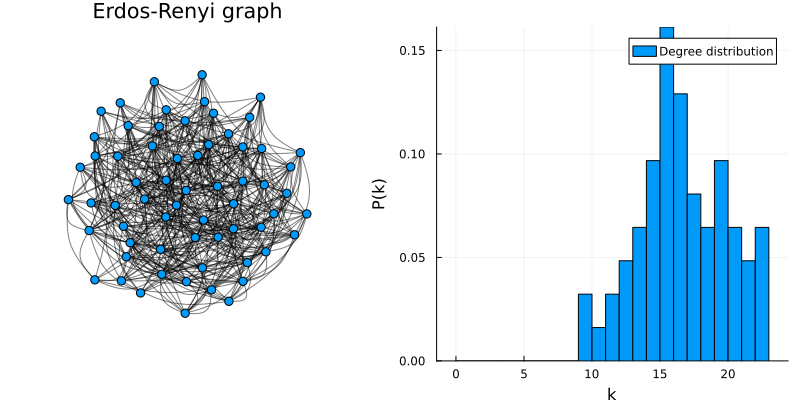

In [35]:
# Plot the graph
p1 = graphplot(
    g,
    markersize=0.15,
    markershape=:circle,
    edgelinewidth=0.1,
    linealpha=0.5,
    size=(400, 400),
    title="Erdos-Renyi graph",
)

# Plot the degree distribution
p2 = histogram(degree(g), bins=0:1:maximum(degree(g)), normed=true,
                label="Degree distribution",xlabel="k",ylabel="P(k)")
p = plot(p1, p2, layout=(1,2), size=(800, 400))

Over this network, we will run a Monte Carlo simulation of our generalized version of the Extended Yard-Sale Model. In this gneralization, we specify an interaction mode for the agents (defining the way they exchange wealth) and a taxation mode (defining the way the government collects taxes and redistributes wealth). The interaction modes available are:
- Interaction Mode A: At each time step, a random link is chosen at random.
- Interaction Mode B: At each time step, a random agent and one of its neighbors are chosen at random.

The taxation modes available are:
- Taxation Mode A: At each time step, The agents who exchange wealth pay taxes.
- Taxation Mode B: Two agents at random are chosen to pay taxes.
The redistribution ocurrs homogeneously, i.e., the total amount of taxes collected is redistributed equally among all agents.

The idea is to explore the effects of different interaction and taxation modes on the wealth distribution of the agents, at different temperatures.

# Run the simulations